<a href="https://colab.research.google.com/github/gershomrichardbruno/gershomrichardbruno.com/blob/main/Diabetes_risk_prediction_using_BMI_and_glucose_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Artifical Neural Networks Mini Project , To Know more about this project click this link :https://gershomrichardbruno.github.io/gershomrichardbruno.com/
import numpy as np
import pandas as pd

np.random.seed(42)
num_samples = 250
glucose_levels = np.random.randint(70, 201, num_samples)
bmi_values = np.random.randint(15, 41, num_samples)
insulin_levels = np.random.randint(2, 301, num_samples)
bp_values = np.random.randint(80, 181, num_samples)

df = pd.DataFrame({
    'Glucose': glucose_levels,
    'BMI': bmi_values,
    'Insulin': insulin_levels,
    'BP': bp_values
})

print(df.head())
df.to_csv("synthetic_diabetes_data.csv", index=False)

   Glucose  BMI  Insulin   BP
0      172   17      224  131
1      162   22       53  158
2       84   28      145  126
3      176   38       70  135
4      141   32      100  165


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['Glucose', 'BMI', 'Insulin', 'BP']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
# For Resources :https://github.com/gershomrichardbruno?tab=projects

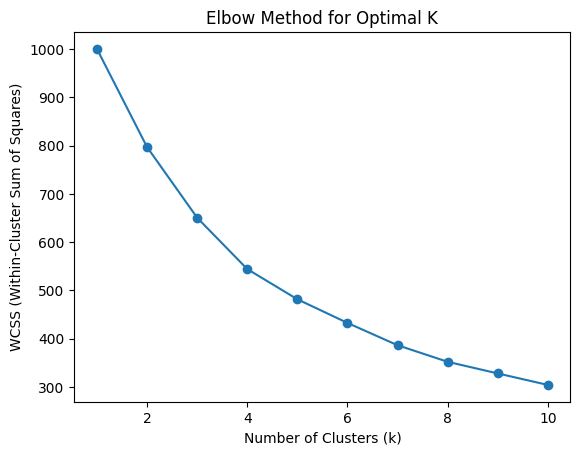

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

print(df.head())

   Glucose  BMI  Insulin   BP  Cluster
0      172   17      224  131        2
1      162   22       53  158        2
2       84   28      145  126        0
3      176   38       70  135        1
4      141   32      100  165        0


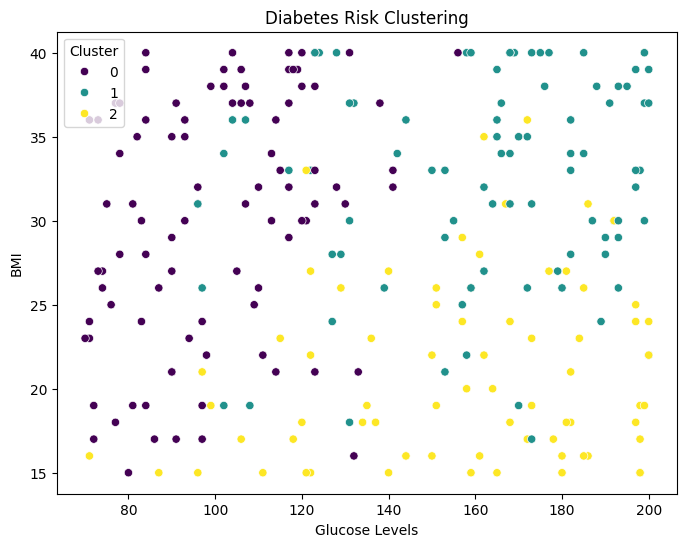

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Glucose Levels')
plt.ylabel('BMI')
plt.title('Diabetes Risk Clustering')
plt.show()

In [ ]:
print(df.groupby('Cluster').mean())

            Glucose        BMI     Insulin          BP
Cluster                                               
0        100.391304  30.228261  104.304348  131.489130
1        162.847059  32.211765  180.164706  105.329412
2        156.917808  21.219178  165.191781  151.109589


In [ ]:

centroids_scaled = kmeans.cluster_centers_

centroids_original = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(centroids_original, columns=['Glucose', 'BMI', 'Insulin', 'BP'])

print("Cluster Centroids:")
print(centroids_df)

Cluster Centroids:
      Glucose        BMI     Insulin          BP
0  100.391304  30.228261  104.304348  131.489130
1  162.847059  32.211765  180.164706  105.329412
2  156.917808  21.219178  165.191781  151.109589


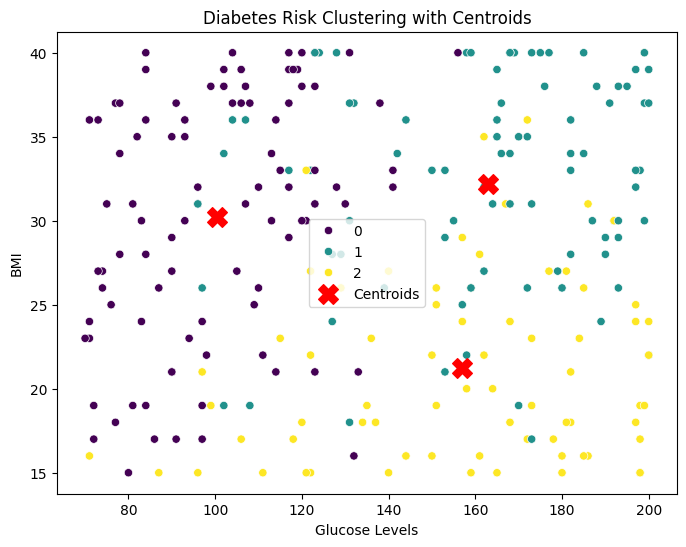

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Cluster'], palette='viridis')

plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            marker='X', s=200, c='red', label='Centroids')

plt.xlabel('Glucose Levels')
plt.ylabel('BMI')
plt.title('Diabetes Risk Clustering with Centroids')
plt.legend()
plt.show()

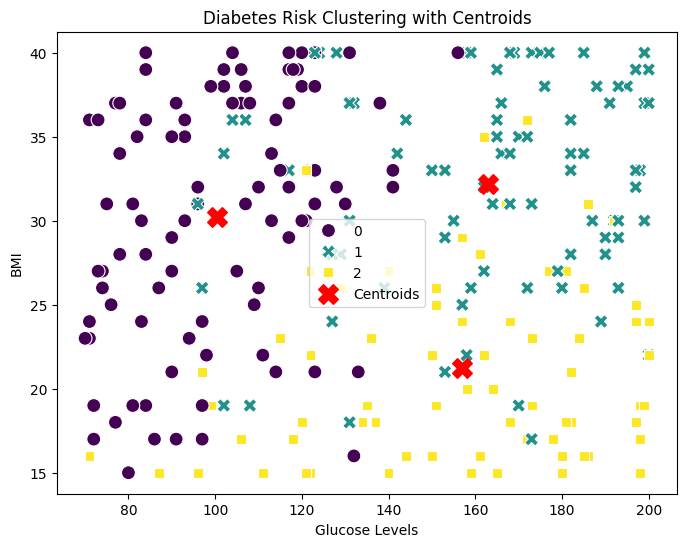

In [ ]:

plt.figure(figsize=(8, 6))


sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Cluster'], palette='viridis', style=df['Cluster'], s=100)

plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            marker='X', s=200, c='red', label='Centroids')

plt.xlabel('Glucose Levels')
plt.ylabel('BMI')
plt.title('Diabetes Risk Clustering with Centroids')

plt.legend()
plt.show()

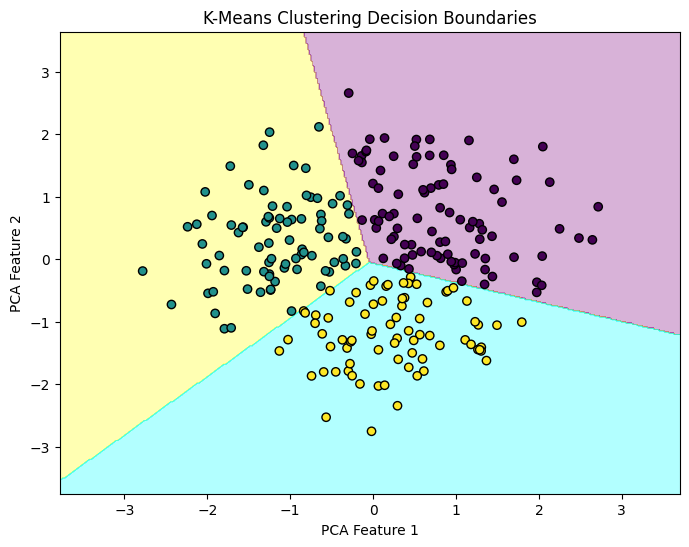

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans_pca.fit_predict(df_pca)

h = .02
x_min, x_max = df_pca[:, 0].min() - 1, df_pca[:, 0].max() + 1
y_min, y_max = df_pca[:, 1].min() - 1, df_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["purple", "yellow", "cyan"]))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="viridis", edgecolor="k")
plt.title("K-Means Clustering Decision Boundaries")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

